# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

- Many volunteering events do not have enough volunteers due to low-budgets for advertising and marketing. A social media recommendation system turns out to be a convenient, inexpensive, and efficient solution to reach a group of potential volunteers. The goal of this case study is to explore the data on twitter and pinpoint certain groups of people who might be interested in helping with upcoming volunteer events.

## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [ ]:
# Pro-import the package in use
import json
import matplotlib.pyplot as plt
from collections import Counter

### Report  statistics about the tweets you collected 

In [ ]:
import twitter
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = ''
    CONSUMER_SECRET =''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# login by tweepy
# mainly for get the screen name
def tweepy_login():
    CONSUMER_KEY = ''
    CONSUMER_SECRET =''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    tweepy_api = tweepy.API(auth)
    
    return tweepy_api

from urllib import unquote

# login twitter
twitter_api = oauth_login()

q = '#volunteering' 

count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# Iterate through 9 more batches of results by following the cursor
for _ in range(9):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show the end of running and the number of the statuses
print "getting statuses --- done: "
print len(statuses)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 700
Length of statuses 800
Length of statuses 900
getting statuses --- done: 
1000


In [2]:
# The total number of tweets collected:  1000

# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = []
for t in status_texts:
    for w in t.split():
#         cleaning the meaningless but frequent words
        if w != "RT" and w != "the" and w != "a" and w != "to" and w != "of"and w != "is"and w != "for"and w != "and" and w != "in":
            if w != "on" and w != "that" and w != "at" and w != "am" and w != "are" and w != "with" and w != "I" and w != "you":
                if w != "he" and w != "she" and w != "we" and w != "they" and w != "https":
                    words.append(w)

#  show the table of frequency of the words
from prettytable import PrettyTable

for label, data in (('Word', words), ):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    # list 30-most frequent words
    [ pt.add_row(kv) for kv in c.most_common()[:30] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+------------------+-------+
| Word             | Count |
+------------------+-------+
| #volunteering    |   525 |
| our              |   199 |
| If               |   102 |
| your             |   102 |
| #Volunteering    |    97 |
| about            |    94 |
| &amp;            |    84 |
| -                |    73 |
| out              |    72 |
| be               |    71 |
| this             |    70 |
| you're           |    64 |
| looking          |    62 |
| us               |    60 |
| from             |    60 |
| We               |    59 |
| @NCVOvolunteers: |    56 |
| can              |    56 |
| new              |    53 |
| how              |    51 |
| The              |    51 |
| today            |    46 |
| volunteers       |    46 |
| volunteer        |    45 |
| How              |    41 |
| great            |    41 |
| work             |    39 |
| so               |    38 |
| more             |    38 |
| by               |    38 |
+------------------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [6]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 50 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 30
pt.align= 'l'
print pt

+-------+----------------+--------------------------------+
| Count | Screen Name    | Text                           |
+-------+----------------+--------------------------------+
| 152   | JohnLoughton   | RT @JohnLoughton: We should    |
|       |                | NEVER forget the priceless     |
|       |                | impact of #volunteering &amp;  |
|       |                | #volunteers in society! So     |
|       |                | powerful. #socent #VolSec      |
|       |                | https…                         |
| 106   | NCVOvolunteers | RT @NCVOvolunteers: How should |
|       |                | you go about  #volunteering    |
|       |                | safely in a #migrantcamp?      |
|       |                | https://t.co/h983dGfU4j        |
| 106   | NCVOvolunteers | RT @NCVOvolunteers: How should |
|       |                | you go about  #volunteering    |
|       |                | safely in a #migrantcamp?      |
|       |                | https://t.co/

In [7]:
#function to count the tweets with maximum retweets
def popular_tweets_count(statuses):
    popular = {}
    for tweet in statuses:
        if "retweeted_status" in tweet.keys() and len(tweet["retweeted_status"])!=0	and tweet["lang"] == "en" \
            and "retweet_count" in tweet["retweeted_status"].keys():
                if tweet["retweeted_status"]["retweet_count"] != 0 and "text" in tweet.keys() and len(tweet["text"])!=0:
                    #to make sure same tweet doesn't go into the list more than once
                    if tweet["text"] not in popular.values(): 
                        popular[tweet["retweeted_status"]["retweet_count"]] = tweet["text"]
    # sort the most popular tweets and extract the top 10                    
    sorted_popular = sorted(popular.items(), key=lambda t: t[0], reverse = True)[:10]
    #return top 10 tweets
    return sorted_popular

#get the top 10 tweets
popular_tweets_count = popular_tweets_count(statuses)


print(str("Top 10 Tweets:"))
table = PrettyTable(field_names=['Count', 'Text'])
[ table.add_row(row) for row in sorted (popular_tweets_count, reverse=True)]
table.max_width['Text'] = 60
table.align= 'l'
print(table)

Top 10 Tweets:
+-------+--------------------------------------------------------------+
| Count | Text                                                         |
+-------+--------------------------------------------------------------+
| 152   | RT @JohnLoughton: We should NEVER forget the priceless       |
|       | impact of #volunteering &amp; #volunteers in society! So     |
|       | powerful. #socent #VolSec https…                             |
| 106   | RT @NCVOvolunteers: How should you go about  #volunteering   |
|       | safely in a #migrantcamp?  https://t.co/h983dGfU4j           |
| 74    | RT @NCVOvolunteers: How should you go about  #volunteering   |
|       | safely in a #migrantcamp?                                    |
| 50    | RT @NCVOvolunteers: If you're #volunteering in #migrant      |
|       | camps, understand the dangers of trafficking and smuggling   |
| 27    | RT @NCVOvolunteers: If you're thinking of #volunteering in   |
|       | refugee camps, check our g

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [8]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
from prettytable import PrettyTable

for label, data in (('Hashtag', hashtags),
                    ('Screen Name', screen_names)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+-----------------+-------+
| Hashtag         | Count |
+-----------------+-------+
| volunteering    |   571 |
| Volunteering    |   106 |
| volunteer       |    34 |
| charity         |    22 |
| generalpractice |    18 |
| migrantcamp     |    14 |
| volunteers      |    13 |
| youngpeople     |    12 |
| community       |    11 |
| rewilding       |     9 |
+-----------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| NCVOvolunteers |    57 |
| coetiranian    |    17 |
| NCVO           |    16 |
| davidjbuck     |    15 |
| TheKingsFund   |    11 |
| RealizedWorth  |    10 |
| nationaltrust  |     9 |
| weldmar        |     9 |
| monographed    |     7 |
| CECPtweets     |     7 |
+----------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

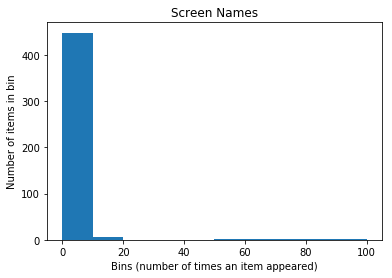

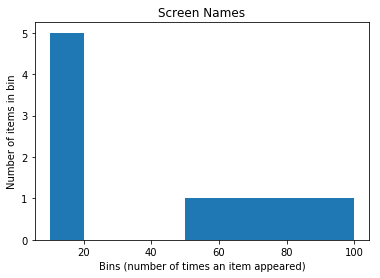

In [9]:
bins=[0, 10, 20, 30, 40, 50, 100]

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

for label, data in (('Screen Names', screen_names),):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values(), bins)
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

# bins with our decision(zoom in in range(10, 100))
bins = [10, 20, 30, 40, 50, 100]
for label, data in (('Screen Names', screen_names),):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values(), bins)
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()


 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# make_twitter_request function
# run this cell previously than the next cell
import sys
import time
from urllib2 import URLError
from httplib import BadStatusLine
import json
import twitter

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
    
        # See https://dev.twitter.com/docs/error-codes-responses for common codes
    
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429: 
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise

In [11]:
# please run the former cell first
from functools import partial
from sys import maxint
# import tweepy to get screen_name
import tweepy

# get the friends and followers ids
def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):
    
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    # See https://dev.twitter.com/docs/api/1.1/get/friends/ids and
    # https://dev.twitter.com/docs/api/1.1/get/followers/ids for details
    # on API parameters
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
            print >> sys.stderr, 'Fetched {0} total {1} ids for {2}'.format(len(ids), 
                                                    label, (user_id or screen_name))
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]

twitter_api = oauth_login()

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name="NCVOvolunteers", 
                                                       friends_limit=20, 
                                                       followers_limit=20)
# login by tweepy
tweepy_api = tweepy_login()
# define the function to get name by id
def get_name(data):
    user = tweepy_api.get_user(data)
    return user.screen_name

# make the friends table
ct_fr = 0
pt_friends = PrettyTable(field_names=['Friends_ids', 'Screen_name'])
for data in friends_ids:
    if ct_fr < 20:
        pt_friends.add_row([data, get_name(data)])
    else:
        break
# show the table
pt_friends.align[label], pt_friends.align['Count'] = 'l', 'r' # Set column alignment
print pt_friends

# make the followers table
ct_fo = 0
pt_followers = PrettyTable(field_names=['Followers_ids', 'Screen_name'])
for data in followers_ids:
    if ct_fo < 20:
        pt_followers.add_row([data, get_name(data)])
    else:
        break
# show the table
pt_followers.align[label], pt_followers.align['Count'] = 'l', 'r' # Set column alignment
print pt_followers

Fetched 1144 total friends ids for NCVOvolunteers
Fetched 5000 total followers ids for NCVOvolunteers


+--------------------+-----------------+
|    Friends_ids     |   Screen_name   |
+--------------------+-----------------+
|     209298351      |   idlehands12   |
|      21400092      |     CPFT_NHS    |
|     115428340      |   Priyanka_210  |
|     314511076      |   PaulWinyard   |
|     931872578      |   charleyallan  |
|     3126832072     |  FantasyFbench  |
|     1487653230     |  bbcgetinspired |
| 882240284041641984 |  communityandy  |
|      58448800      |  PositiveNewsUK |
|     409409816      |  chriswademnda  |
|      29416787      |      RedRUK     |
|      19765025      |     debusis     |
|      19976630      |       IPPR      |
|      68377720      |  resfoundation  |
|      25820267      | mynameisDanFran |
|     501019550      |  EmilyAGraham2  |
|     2262623615     |   TorstenBell   |
|      85601716      |   MuseumsAssoc  |
|     383238347      |   cj_dinenage   |
|     422184091      |   DamianGreen   |
+--------------------+-----------------+


TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/users/show.json?id=834649746769899520 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000001CF08278>: Failed to establish a new connection: [Errno 10060] ',))

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

- Explore the data to identify the most popular tweets related volunteering topic.
- Identify accounts  related to the most popular tweets.
- Retrive roughly 50 friends and 50 followers of “influential” twitter accounts. 
- Provide retrieved data to a recommendation system on twitter so that those followers and friends will get notified about those upcoming volunteering events in their newsfeed.

Write codes to implement the solution in python:

In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

most_popular_user = ""
for label, data in (('Screen Name', screen_names),):
    c = Counter(data)
    # get the most popular user
    for kv in c.most_common()[:1]:
        most_popular_user = kv[0]
        print "most popular user at this time: " + kv[0]

twitter_api = oauth_login()

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name=most_popular_user, 
                                                       friends_limit=1000, 
                                                       followers_limit=1000)

import random

# randomly get 50 followers and 50 friends from the most_popular_user

print "random 50 followers:"
# randomly take 50 followers
rdm_fo = random.sample(followers_ids, 50)
# make the table
pt_rdm_fo = PrettyTable(field_names=['num','Followers_ids', 'Screen_name'])
# put the row into the table
num = 1
for data in rdm_fo:
    pt_rdm_fo.add_row([num, data, get_name(data)])
    num += 1
# show the table
print pt_rdm_fo

print "random 50 friends:"
# randomly take 50 friends
rdm_fr = random.sample(friends_ids, 50)
# make the table
pt_rdm_fr = PrettyTable(field_names=['num','Friends_ids', 'Screen_name'])
# put the row into the table
num = 1
for data in rdm_fr:
    pt_rdm_fr.add_row([num, data, get_name(data)])
    num += 1
# show the table
print pt_rdm_fr

most popular user at this time: NCVOvolunteers


URLError encountered. Continuing.
Fetched 1144 total friends ids for NCVOvolunteers
Fetched 5000 total followers ids for NCVOvolunteers


random 50 followers:
+-----+--------------------+-----------------+
| num |   Followers_ids    |   Screen_name   |
+-----+--------------------+-----------------+
|  1  |      36025286      |      Tsumbi     |
|  2  |     432029072      |    photo_ace    |
|  3  |     831042049      |   KevinHesketh  |
|  4  | 902977957936889856 | JonasHenderson7 |
|  5  |     2907344643     |    UnganoTena   |
|  6  |     485129932      |   MinerRachel   |
|  7  |     586998343      |   JaneJutsum1   |
|  8  | 844955717626990592 |  AnneJeglinski  |
|  9  | 894155211702505472 |  SamuelJonesSJA |
|  10 |     498790489      |  ayissijoachim  |
|  11 |     301474895      |    Ibekweuche   |
|  12 |     472237790      |   princeomowa   |
|  13 |     1861772714     |     RyderMum    |
|  14 |     3676273475     | EarlyCareerBohn |
|  15 |      27687865      |   akki4design   |
|  16 |     822301405      |   yuungcoconut  |
|  17 | 932977294553112578 |   DaniKnoxIFC   |
|  18 | 931405013192192001 |    NolanC2

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [18]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# visualize the most popular words at this time
from wordcloud import WordCloud

listforwordcloud = []
listforusercloud = []

for label, data in (('Screen Name', screen_names),):
    c = Counter(data)
    [ listforusercloud.append(kv) for kv in c.most_common()[:100]]

for label, data in (('Word', words), ):
    c = Counter(data)
    [ listforwordcloud.append(kv) for kv in c.most_common()[:200]]

word_dict = {}
for word in listforwordcloud:
    word_dict[word[0]] = word[1]
    
user_dict = {}
for user in listforusercloud:
    user_dict[user[0]] = user[1]

wordcloud = WordCloud(background_color="white",width=2000, height=1200, margin=2).generate_from_frequencies(word_dict)
usercloud = WordCloud(background_color="white",width=2000, height=1200, margin=2).generate_from_frequencies(user_dict)

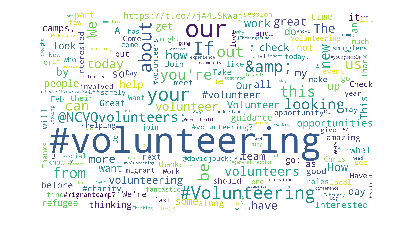

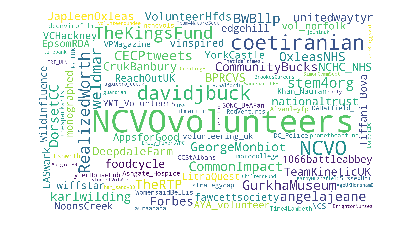

In [19]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.png')
plt.imshow(usercloud)
plt.axis("off")
plt.show()
usercloud.to_file('usercloud.png')

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

